https://www.youtube.com/watch?v=0irmDBWLrco

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home wins
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,T
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,W
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,W
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,T
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,W


In [4]:
df.shape

(39654, 11)

In [5]:
39654*9

356886

In [6]:
df["home_team"].value_counts()

Brazil                       550
Argentina                    535
Germany                      495
Mexico                       494
England                      483
                            ... 
Wallis Islands and Futuna      1
Crimea                         1
Sark                           1
Cascadia                       1
Kabylia                        1
Name: home_team, Length: 291, dtype: int64

In [7]:
df[df["tournament"] == "FIFA World Cup"]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home wins
1277,7/13/30,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,-3,L
1278,7/13/30,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,3,W
1279,7/14/30,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,-1,L
1280,7/14/30,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,-2,L
1281,7/15/30,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,W
...,...,...,...,...,...,...,...,...,...,...,...
39649,6/27/18,Switzerland,Costa Rica,2,2,FIFA World Cup,Nizhny Novgorod,Russia,True,0,T
39650,6/28/18,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,-1,L
39651,6/28/18,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,-1,L
39652,6/28/18,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,-1,L


In [8]:
wc = df[df["tournament"] == "FIFA World Cup"]

In [9]:
wc

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home wins
1277,7/13/30,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,-3,L
1278,7/13/30,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,3,W
1279,7/14/30,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,-1,L
1280,7/14/30,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,-2,L
1281,7/15/30,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,W
...,...,...,...,...,...,...,...,...,...,...,...
39649,6/27/18,Switzerland,Costa Rica,2,2,FIFA World Cup,Nizhny Novgorod,Russia,True,0,T
39650,6/28/18,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,-1,L
39651,6/28/18,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,-1,L
39652,6/28/18,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,-1,L


In [10]:
wc.describe()

,home_score,away_score,home-away
count,884.000000,884.000000,884.000000
mean,1.566742,1.262443,0.304299
std,1.494824,1.320246,2.052301
min,0.000000,0.000000,-8.000000
25%,0.000000,0.000000,-1.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000
max,10.000000,8.000000,9.000000


In [11]:
wc = wc.drop(columns=["city", "country", "tournament"])

In [12]:
wc

,date,home_team,away_team,home_score,away_score,neutral,home-away,home wins
1277,7/13/30,Belgium,USA,0,3,True,-3,L
1278,7/13/30,France,Mexico,4,1,True,3,W
1279,7/14/30,Brazil,Yugoslavia,1,2,True,-1,L
1280,7/14/30,Peru,Romania,1,3,True,-2,L
1281,7/15/30,Argentina,France,1,0,True,1,W
...,...,...,...,...,...,...,...,...
39649,6/27/18,Switzerland,Costa Rica,2,2,True,0,T
39650,6/28/18,Japan,Poland,0,1,True,-1,L
39651,6/28/18,Senegal,Colombia,0,1,True,-1,L
39652,6/28/18,Panama,Tunisia,1,2,True,-1,L


In [13]:
wc.dtypes.value_counts()

object    4
int64     3
bool      1
dtype: int64

In [14]:
wc["home_team"].value_counts()

Brazil                  82
Germany                 77
Argentina               60
Italy                   49
France                  37
                        ..
El Salvador              1
United Arab Emirates     1
Iraq                     1
Canada                   1
Panama                   1
Name: home_team, Length: 78, dtype: int64

In [15]:
wc.isnull().sum().sort_values()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
neutral       0
home-away     0
home wins     0
dtype: int64

In [16]:
wc.shape[0]

884

In [17]:
wc.shape[1]

8

In [18]:
hot_encode_cols = wc.dtypes[wc.dtypes==np.object]

In [19]:
wc_list = hot_encode_cols.index.tolist()

In [20]:
wc_list

['date', 'home_team', 'away_team', 'home wins']

In [21]:
hot_encode_cols

date         object
home_team    object
away_team    object
home wins    object
dtype: object

In [22]:
wc

,date,home_team,away_team,home_score,away_score,neutral,home-away,home wins
1277,7/13/30,Belgium,USA,0,3,True,-3,L
1278,7/13/30,France,Mexico,4,1,True,3,W
1279,7/14/30,Brazil,Yugoslavia,1,2,True,-1,L
1280,7/14/30,Peru,Romania,1,3,True,-2,L
1281,7/15/30,Argentina,France,1,0,True,1,W
...,...,...,...,...,...,...,...,...
39649,6/27/18,Switzerland,Costa Rica,2,2,True,0,T
39650,6/28/18,Japan,Poland,0,1,True,-1,L
39651,6/28/18,Senegal,Colombia,0,1,True,-1,L
39652,6/28/18,Panama,Tunisia,1,2,True,-1,L


In [23]:
data = wc.copy()

In [24]:
data["date"] = pd.to_datetime(data["date"])

In [25]:
data.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
neutral                 bool
home-away              int64
home wins             object
dtype: object

### Add Neutral site to 1 and Not Neutral sites to 0

In [26]:
data.neutral.value_counts()

True     768
False    116
Name: neutral, dtype: int64

In [27]:
data["venue"] = data["neutral"].astype("category").cat.codes

In [28]:
data.venue.value_counts()

1    768
0    116
Name: venue, dtype: int64

### Add numerical values inplace of away teams string value

In [29]:
data.away_team.value_counts()

Uruguay           37
Italy             34
Germany           32
Spain             32
Mexico            30
                  ..
Haiti              2
Czech Republic     1
Togo               1
Indonesia          1
Congo DR           1
Name: away_team, Length: 79, dtype: int64

In [30]:
data["away_code"] = data["away_team"].astype("category").cat.codes

In [31]:
data.away_code.value_counts()

76    37
38    34
27    32
66    32
45    30
      ..
30     2
18     1
69     1
34     1
15     1
Name: away_code, Length: 79, dtype: int64

In [34]:
data

,date,home_team,away_team,home_score,away_score,neutral,home-away,home wins,venue,away_code
1277,2030-07-13,Belgium,USA,0,3,True,-3,L,1,73
1278,2030-07-13,France,Mexico,4,1,True,3,W,1,45
1279,2030-07-14,Brazil,Yugoslavia,1,2,True,-1,L,1,78
1280,2030-07-14,Peru,Romania,1,3,True,-2,L,1,57
1281,2030-07-15,Argentina,France,1,0,True,1,W,1,25
...,...,...,...,...,...,...,...,...,...,...
39649,2018-06-27,Switzerland,Costa Rica,2,2,True,0,T,1,16
39650,2018-06-28,Japan,Poland,0,1,True,-1,L,1,55
39651,2018-06-28,Senegal,Colombia,0,1,True,-1,L,1,14
39652,2018-06-28,Panama,Tunisia,1,2,True,-1,L,1,71


###  Add numerical value of Wins and Losses

In [35]:
data["target"] = (data["home wins"] == "W").astype("int")

In [36]:
data

,date,home_team,away_team,home_score,away_score,neutral,home-away,home wins,venue,away_code,target
1277,2030-07-13,Belgium,USA,0,3,True,-3,L,1,73,0
1278,2030-07-13,France,Mexico,4,1,True,3,W,1,45,1
1279,2030-07-14,Brazil,Yugoslavia,1,2,True,-1,L,1,78,0
1280,2030-07-14,Peru,Romania,1,3,True,-2,L,1,57,0
1281,2030-07-15,Argentina,France,1,0,True,1,W,1,25,1
...,...,...,...,...,...,...,...,...,...,...,...
39649,2018-06-27,Switzerland,Costa Rica,2,2,True,0,T,1,16,0
39650,2018-06-28,Japan,Poland,0,1,True,-1,L,1,55,0
39651,2018-06-28,Senegal,Colombia,0,1,True,-1,L,1,14,0
39652,2018-06-28,Panama,Tunisia,1,2,True,-1,L,1,71,0


In [43]:
data["day_code"] = data["date"].dt.dayofweek

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'home_score'}>,
        <AxesSubplot:title={'center':'away_score'}>],
       [<AxesSubplot:title={'center':'home-away'}>,
        <AxesSubplot:title={'center':'venue'}>,
        <AxesSubplot:title={'center':'away_code'}>],
       [<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'day_code'}>, <AxesSubplot:>]],
      dtype=object)

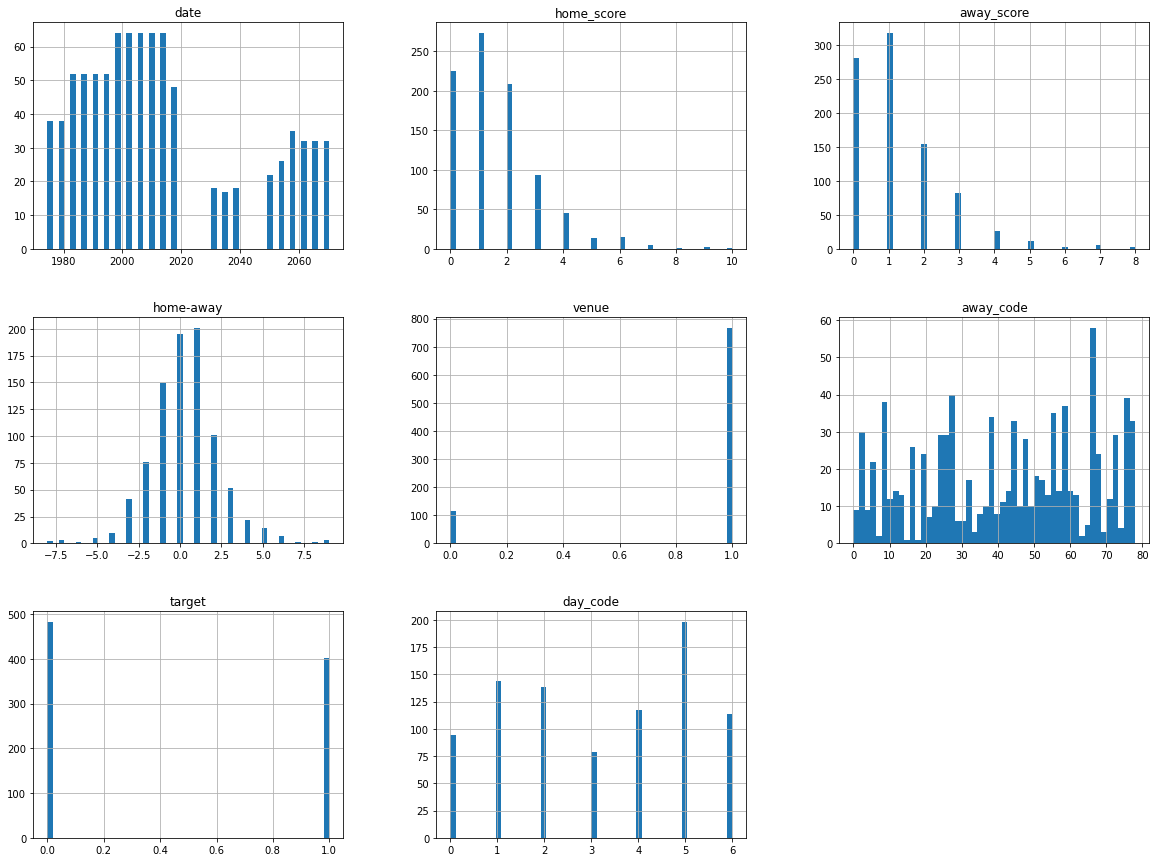

In [44]:
data .hist(bins=50, figsize=(20,15))

### Will need to transform these attributes to have a bell-shaped distribution. Currently the histograms are tail-heavy

In [45]:
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree=2, include_bias=False,)
# X = wc.drop(axis=1, columns=['home_score', 'away_score', 'neutral'])
# y = wc["home_score"]
# X_pf = pf.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=72018)

In [46]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=50 (50 is the number of ) 
min_samples_split=10 (number of smaples we want in a leaf of the decision tree)
random_state

In [47]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [48]:
train = data[data["date"] < '2018-01-01']

In [49]:
test = data[data["date"] > '2018-01-01']

In [50]:
predictors = ["venue", "away_code", "day_code"]

In [51]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [52]:
preds = rf.predict(test[predictors])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acc = accuracy_score(test["target"], preds)

## How often are predictions come true is currently 56%

In [55]:
acc

0.5642857142857143

In [57]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [58]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,112,41
1,81,46


When predicting a loss: 
    - correct 112
    - incorrect 81
    
When predicting a win:
    - correct 46
    - incorrect 41

### Revise accuracy metric

In [59]:
from sklearn.metrics import precision_score

In [60]:
precision_score(test["target"], preds)

0.5287356321839081

### Precision is only 52%

In [62]:
grouped_matches = data.groupby("home_team")

In [63]:
group = grouped_matches.get_group("Brazil")

In [64]:
group

,date,home_team,away_team,home_score,away_score,neutral,home-away,home wins,venue,away_code,target,day_code
1279,2030-07-14,Brazil,Yugoslavia,1,2,True,-1,L,1,78,0,6
1652,2034-05-27,Brazil,Spain,1,3,True,-2,L,1,66,0,5
2050,2038-06-05,Brazil,Poland,6,5,True,1,W,1,55,1,5
2060,2038-06-12,Brazil,Czechoslovakia,1,1,True,0,T,1,19,0,5
2064,2038-06-14,Brazil,Czechoslovakia,2,1,True,1,W,1,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35972,2014-07-04,Brazil,Colombia,2,1,False,1,W,0,14,1,4
35977,2014-07-08,Brazil,Germany,1,7,False,-6,L,0,27,0,1
35980,2014-07-12,Brazil,Netherlands,0,3,False,-3,L,0,47,0,5
39616,2018-06-17,Brazil,Switzerland,1,1,True,0,T,1,68,0,6


In [65]:
# a